# Newton's Method

In [8]:
import matplotlib.pyplot as plt
%matplotlib notebook
import numpy as np
from numpy import polyder, poly1d
import ipywidgets as wd
from scipy.optimize import newton

Newton's method is a standard algorithm to solve non-linear equations, i.e. equations of the form
$$ F(x)=0, $$
where $F:\mathbb{R}^m \to \mathbb{R}^m$ is a non-linear function. Solving such a non-linear equation can be very difficult in general, yet solving linear equations is easy and well understood. The idea of Newton's method is to assume that $F$ is differentiable and thus reducing the problem of solving a non-linear equation to solving a linear equation by approximating $F$ by its differential $\nabla F$. This only yields an approximate solution, but when applied iteratively, one can hope to converge to the exact solution

# The 1D case

We first consider the one-dimensional case of a function $f:\mathbb{R} \to \mathbb{R}$ and we have to assume that $f$ is differentiable at least once. We also assume that we are given a start value $x_0$. The tangent to the graph of $f$ through the point $(x_0, f(x_0))$ is given by
$$t_0(x) = f'(x_0)(x-x_0) + f(x_0)$$
The root $x_1$ of the tangent can be found easily as
$$ 0 = t_0(x_1) = f'(x_0)(x_1-x_0) + f(x_0) \Longleftrightarrow x_1 = x_0 - \frac{f(x_0)}{f'(x_0)} $$
Thus, we take $x_1$ as our improved guess of the root of $f$. If we are not yet happy with that approximation, we can successively continue this, which yields the following recursively defined sequence, called the **Newton's method sequence**:

\begin{align}
    x_{n+1} = x_n - \frac{f(x_n)}{f'(x_n)}
\end{align}

## Example: Polynomials

As an example we consider 3rd order polynomials, i.e. the functions of the form
$$ p(x) = c_3 x^3 + c_2 x^2 +  c_1 x^1 + c_0 $$


In [9]:
def newton_1d_poly(c, x0, N):
    """
    Calculates the Newton's sequence for a polynomial with coefficients c=(c_0, \ldots, c_d) at initial value x0.
    
    params:
    c : numpy array with coefficients c[i] corresponds to c_i
    x0: initial value
    N : number of iterations
    
    returns: numpy array x with x_0, \ldots, x_N elements of the Newton sequence
    """
    x = np.zeros(N+1)
    x[0] = x0
    c = c[::-1] # poly1d and polyder assume that coefficients are in decreasing order
    p = poly1d(c)
    dp = poly1d(polyder(c))
    for n in range(N):
        x[n+1] = x[n] - p(x[n]) / dp(x[n])
    return x

<IPython.core.display.Javascript object>


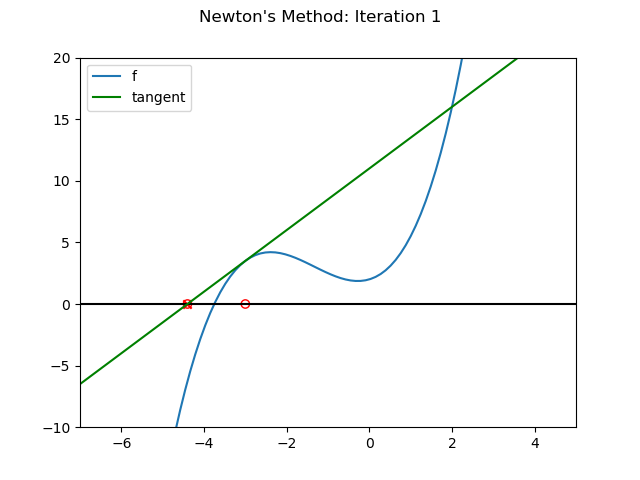

interactive(children=(FloatSlider(value=2.0, description='c0', max=3.0, min=-3.0), FloatSlider(value=1.0, desc…

In [21]:
fig, ax = plt.subplots()

@wd.interact(c0=wd.FloatSlider(min=-3, max=3, value=2),
             c1=wd.FloatSlider(min=-3, max=3, value=1),
             c2=wd.FloatSlider(min=-3, max=3, value=2),
             c3=wd.FloatSlider(min=-3, max=3, value=0.5),
             x0=wd.FloatSlider(min=-5, max=5, value=-3),
             N=wd.IntSlider(min=1, max=20, value=1),
             xlim_min=wd.FloatSlider(min=-10, max=0, value=-7),
             xlim_max=wd.FloatSlider(min=0, max=10, value=5),
             ylim_min=wd.FloatSlider(min=-50, max=0, value=-10),
             ylim_max=wd.FloatSlider(min=0, max=50, value=20),
            )
def plot_1d_example(c0, c1, c2, c3, x0, N, xlim_min, xlim_max, ylim_min, ylim_max):
    ax.clear()
    c = np.array([c0, c1, c2, c3])
    xgrid = np.linspace(xlim_min, xlim_max, 100)
    ygrid = poly1d(c[::-1])(xgrid)
    x = newton_1d_poly(c, x0, N)
    fig.suptitle('Newton\'s Method: Iteration %i' % N)
    ax.plot(xgrid, ygrid, label='f')
    ax.axhline(y=0, color='k')
    ax.scatter(x, np.zeros_like(x), marker='o', facecolors='none', edgecolors='r')
    ax.scatter(x[N], 0, marker='x', color='r')
    ax.plot(xgrid,poly1d(polyder(c[::-1]))(x[N-1])*(xgrid -x[N-1]) + poly1d(c[::-1])(x[N-1]), color='g', label='tangent')
    ax.set_xlim([xlim_min, xlim_max])
    ax.set_ylim([ylim_min, ylim_max])
    ax.legend()
    print("Solution (current guess): %f" % x[N])
    print("Solution (scipy): %f" % newton(poly1d(c[::-1]), x0))

## Example: Square Root

One of the most popular examples of the Newton's method is the calculation of the square root of a number $a \in \mathbb{R}_{>0}$. This can be expressed as the root of $f_a:\mathbb{R}_{>0} \to \mathbb{R}$, $x \mapsto 1 - \frac{a}{x^2}$. We choose $x_0 := a$ as the initial guess and the Newton sequence in this case is given by
$$ x_{n+1} 
= x_n - \frac{f_a(x_n)}{f_a'(x_n)}
= x_n - \frac{1-\frac{a}{x_n^2}}{2ax_n^{-3}}
= x_n - \frac{x_n^3}{2a} + \frac{x_n}{2}
= \frac{x_n}{2}\Big( 3 - \frac{x_n^2}{a} \Big)$$
This sequence is called *Heron's method* and converges quite quickly.

<IPython.core.display.Javascript object>


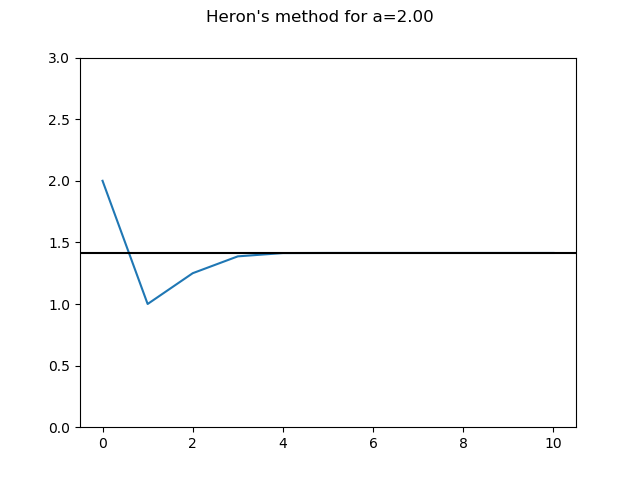

interactive(children=(FloatSlider(value=2.0, description='a', max=3.0, min=1.0), IntSlider(value=10, descripti…

In [11]:
fig, ax = plt.subplots()

@wd.interact(a=wd.FloatSlider(min=1, max=3, value=2),
             N=wd.IntSlider(min=1, max=100, value=10))
def plot_square_root(a, N):
    fig.suptitle('Heron\'s method for a=%0.2f' % a)
    ax.clear()
    x = np.zeros(N+1)
    x[0] = a
    for n in range(N):
        x[n+1] = x[n]/2*(3 - x[n]**2/a)
    ax.plot(range(N+1), x)
    ax.axhline(y=np.sqrt(a), color='k')
    ax.set_ylim([0, 3])

# Multi-Dimensional Newton's Method

In [12]:
def F(x):
    return np.array([0.2 * x[0]**2 + x[1] - 1, 
                     0.5*x[1]**3 + x[0] + 1])

def dF(x):
    return np.array([[0.4 * x[0], 1],
                     [1, 1.5*x[1]**2]])

def newton_naive(F, dF, x0, N):
    X = np.zeros((N+1, x0.shape[0]))
    X[0, :] = x0
    for n in range(N):
        X[n+1, :] = X[n, :] - np.linalg.inv(dF(X[n, :])) @ F(X[n, :]) 
    return X

In [13]:
X, Y = np.meshgrid(np.linspace(0, 5, 20), 
                   np.linspace(-4, 1, 20))
X = X.flatten()
Y = Y.flatten()
ZX, ZY = np.array(np.array([F(np.array([x, y])) for x,y in zip(X,Y)])).T

<IPython.core.display.Javascript object>


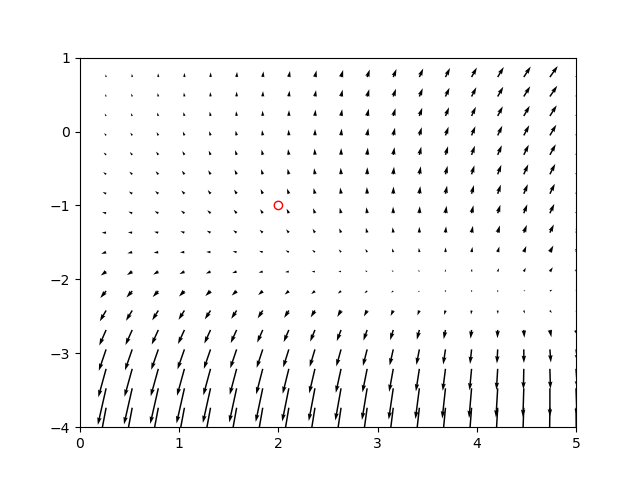

interactive(children=(FloatSlider(value=2.0, description='x0x', max=5.0, min=-5.0), FloatSlider(value=-1.0, de…

In [14]:
fig, ax = plt.subplots()

@wd.interact(x0x=wd.FloatSlider(min=-5, max=5, value=2),
             x0y=wd.FloatSlider(min=-5, max=5, value=-1),
             N=wd.IntSlider(min=1, max=100, value=1))
def plot_newton(x0x, x0y, N):
    x0 = np.array([x0x, x0y])
    ax.clear()
    ax.quiver(X, Y, ZX, ZY)
    Xnwt = newton_naive(F, dF, x0, N)
    ax.scatter(Xnwt[:,0], Xnwt[:,1], marker='o', facecolors='none', edgecolors='r')
    ax.set_xlim([0, 5])
    ax.set_ylim([-4, 1])
    plt.show()
    print("Solution (current guess): " + str(Xnwt[N, :]))
    print("Solution (scipy):  " + str(newton(F, x0, maxiter=100)))

# Netwon's Method for Optimization
Newton's method can be used for optimization: If one wants to find a solution to
$$ \min_{x \in \mathbb{R}}{f(x)} $$
then a neccessary condition for a local optimum $x^*$ is $f'(x^*)=0$. Thus by applying Newton's method to $f'$ one can find a local optimum of $f$. The Newton sequence is then given by
$$ x_{n+1} = x_n - \frac{f'(x_n)}{f''(x_n)}. $$
As we can see, this requires $f$ to be twice differentiable and requires the computation of second order derivatives. This also applies in multiple dimensions: If $f:\mathbb{R}^n \to \mathbb{R}$, then a necessary condition for $x^*$ to be a local optimum is that $\nabla F: \mathbb{R}^n \to \mathbb{R}^n$ vanishes at $x^*$. The Newton sequence requires the computation of the Hessian $\nabla^2 F: \mathbb{R}^n \to \mathbb{R}^{n \times n}$:
$$ x_{n+1} = x_n - \nabla^2 F(x_n)^{-1} \nabla F(x_n)$$
For that reason, other methods such as *gradient descent* are sometimes used.

# Properties of the Newton's Method

**1. Local Quadratic Convergence:** The Newton sequence converges quadratically against the root in a local neighbourhood around the root. Thus, the choice of a good starting value is key. In particular, if $F$ has multiple roots, Newton's method finds one root, not all of them.

**2. Singluar Jacobian:** If the Jacobian $\nabla F$ fails to be invertible, the computation of the next element in the sequence becomes problematic.

**3. Cycles:** For certain values, the sequence can become periodic, thus failing to converge.

**4. Computational Complexities:** Calculating the full Jacobian $\nabla F$ and solving the resulting system of linear equations in every step can be quite intense computationally.

The last step can be addressed by replacing the full Jacobian $\nabla F$ by an approximation. Those methods are called *Quasi-Newton methods*. 